In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split
#from graphMeasures import FeatureCalculator
import networkx as nx
import community
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Load data
with open('deezer_edges.json') as json_data:
    data = json.load(json_data)
    deezer_edges = list(data.values())

deezer_target = pd.read_csv('deezer_target.csv')
deezer_target = [m[1] for m in deezer_target.values.tolist()]

In [3]:
import networkx as nx
from typing import List, Tuple

def extract_graph_features(G: nx.Graph) -> List[float]:
    features = []

    # Average neighbor degree
    avg_neighbor_degrees = dict(nx.average_neighbor_degree(G))
    avg_neighbor_degrees = [avg_neighbor_degrees[n] for n in G.nodes()]
    features.extend([np.mean(avg_neighbor_degrees), np.median(avg_neighbor_degrees), np.std(avg_neighbor_degrees), np.max(avg_neighbor_degrees)])

    # Degree
    degrees = dict(G.degree())
    degrees = [degrees[n] for n in G.nodes()]
    features.extend([np.mean(degrees), np.median(degrees), np.std(degrees), np.min(degrees), np.max(degrees)])

    # In-degree
    in_degrees = dict(G.in_degree())
    in_degrees = [in_degrees[n] if n in in_degrees else 0 for n in G.nodes()]
    features.extend([np.mean(in_degrees), np.median(in_degrees), np.std(in_degrees), np.max(in_degrees)])

    # Out-degree
    out_degrees = dict(G.out_degree())
    out_degrees = [out_degrees[n] if n in out_degrees else 0 for n in G.nodes()]
    features.extend([np.mean(out_degrees), np.median(out_degrees), np.std(out_degrees),np.min(out_degrees), np.max(out_degrees)])

    # K-core
    k_cores = nx.core_number(G)
    k_cores = [k_cores[n] for n in G.nodes()]
    features.extend([np.mean(k_cores), np.median(k_cores), np.std(k_cores), np.min(k_cores), np.max(k_cores)])

    # Page Rank
    page_ranks = dict(nx.pagerank(G))
    page_ranks = [page_ranks[n] for n in G.nodes()]
    features.extend([np.mean(page_ranks), np.median(page_ranks), np.std(page_ranks), np.min(page_ranks), np.max(page_ranks)])

    # Betweenness Centrality
    betweenness_centrality = dict(nx.betweenness_centrality(G))
    betweenness_centrality = [betweenness_centrality[n] for n in G.nodes()]
    features.extend([np.mean(betweenness_centrality), np.median(betweenness_centrality), np.std(betweenness_centrality), np.max(betweenness_centrality)])

    # Clustering Coefficient
    clustering_coefficient = dict(nx.clustering(G))
    clustering_coefficient = [clustering_coefficient[n] for n in G.nodes()]
    features.extend([np.mean(clustering_coefficient), np.median(clustering_coefficient), np.std(clustering_coefficient), np.max(clustering_coefficient)])

    # Square Clustering Coefficient
    square_clustering_coefficient = dict(nx.square_clustering(G))
    square_clustering_coefficient = [square_clustering_coefficient[n] for n in G.nodes()]
    features.extend([np.mean(square_clustering_coefficient), np.median(square_clustering_coefficient), np.std(square_clustering_coefficient), np.max(square_clustering_coefficient)])

    # Closeness Cent
    closeness_centrality = dict(nx.closeness_centrality(G))
    closeness_centrality = [closeness_centrality[n] for n in G.nodes()]
    features.extend([np.mean(closeness_centrality), np.median(closeness_centrality), np.std(closeness_centrality), np.max(closeness_centrality)])

    # Load Centrality
    load_centrality = dict(nx.load_centrality(G))
    load_centrality = [load_centrality[n] for n in G.nodes()]
    features.extend([np.mean(load_centrality), np.median(load_centrality), np.std(load_centrality), np.max(load_centrality)])

    return features

In [4]:
# Prepare dataset
final_dataset = [[deezer_target[indx], deezer_edges[indx]] for indx in range(len(deezer_target))]
y = [a[0] for a in final_dataset]
data = [a[1] for a in final_dataset]

In [5]:
l = 2000
super_final_dataset = [extract_graph_features(nx.DiGraph(graph)) for graph in data[0:l]]
y = y[0:l]

In [6]:
super_final_df = pd.DataFrame(super_final_dataset, columns=["avg_neighbor_degree_mean", "avg_neighbor_degree_median", "avg_neighbor_degree_std", "avg_neighbor_degree_max",
"degree_mean", "degree_median", "degree_std", "degree_min", "degree_max",
"in_degree_mean", "in_degree_median", "in_degree_std", "in_degree_max",
"out_degree_mean", "out_degree_median", "out_degree_std","out_degree_min", "out_degree_max",
"k_core_mean", "k_core_median", "k_core_std", "k_core_min", "k_core_max",
"page_rank_mean", "page_rank_median", "page_rank_std", "page_rank_min", "page_rank_max",
"betweenness_centrality_mean", "betweenness_centrality_median", "betweenness_centrality_std", "betweenness_centrality_max",
"clustering_coefficient_mean", "clustering_coefficient_median", "clustering_coefficient_std", "clustering_coefficient_max",
"square_clustering_coefficient_mean", "square_clustering_coefficient_median", "square_clustering_coefficient_std", "square_clustering_coefficient_max",
"closeness_centrality_mean", "closeness_centrality_median", "closeness_centrality_std", "closeness_centrality_max",
"load_centrality_mean", "load_centrality_median", "load_centrality_std", "load_centrality_max"])

In [7]:
y = [a[0] for a in final_dataset][0:l]

# ######################################################

In [8]:
X_train, X_test, y_train, y_test = train_test_split(super_final_df, y, test_size=0.2, random_state=42)

## Clustering

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

In [10]:
tsne =TSNE(2)
tsne_emb_train = tsne.fit_transform(X_train)
tsne_emb_test = tsne.fit_transform(X_test)

In [11]:
k=2

In [12]:
#KMEANS
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
clusters_km = kmeans.predict(X_train)

In [13]:
#minibatch k means
mbkm = MiniBatchKMeans(n_clusters=k).fit(X_train)
clusters_mbkm = mbkm.predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_train)

In [15]:
#Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
clusters_hier = hierarchical_clustering.fit_predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


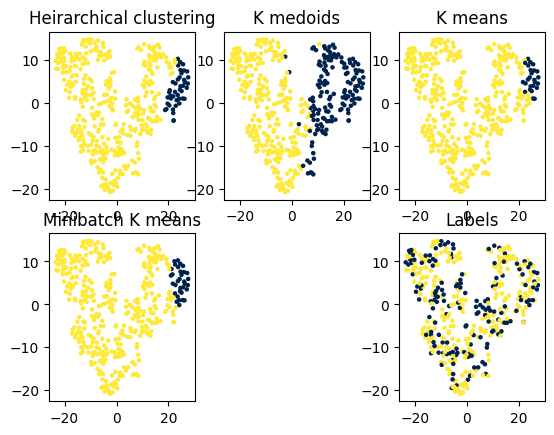

In [16]:
predicted_clusters = [[int(x) for x in hierarchical_clustering.fit_predict(X_test)],
                      [int(x) for x in kmedoids.predict(X_test)],
                      [int(x) for x in kmeans.predict(X_test)],
                      [int(x) for x in mbkm.predict(X_test)]]
methods = ["Heirarchical clustering", "K medoids", "K means", "Minibatch K means"]

for i, method, cluster in zip(range(1,5), methods, predicted_clusters):
    plt.subplot(2,3,i)
    plt.scatter(tsne_emb_test[:,0], tsne_emb_test[:,1], c=cluster,s=5, cmap="cividis_r")
    plt.title(method)

plt.subplot(2,3,6)
plt.scatter(tsne_emb_test[:,0], tsne_emb_test[:,1], c=y_test,s=5, cmap="cividis_r")
plt.title("Labels")    
plt.show()

### Statistical Tests

In [17]:
#mutual information
from sklearn.metrics import mutual_info_score

def calculate_mi_on_groups(cluster, labels, r, g):
    mi = []
    for i in range(0,r): 
        clusters_group = cluster[i*g: (i+1)*g]
        labels_group = labels[i*g: (i+1)*g]
        mi.append(mutual_info_score(clusters_group, labels_group))
    return mi  

In [18]:
len(y_test)

400

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#Define the colormap
cmap = plt.get_cmap('RdYlBu')

labels_list_train = y_train
labels_list_test = y_test

mutual_informations = []
mutual_informations_vectors = []
labels = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mi = calculate_mi_on_groups(cluster_, y_test, 50, 10)
    mutual_informations.append(np.mean(mi))
    mutual_informations_vectors.append(mi)
    labels.append(method_)
    print(f"mutual information between {method_} and the ground truth is {np.mean(mi)}")

#Plot the bar graph
fig, ax = plt.subplots()
bars = ax.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

#Add labels and title
ax.set_ylabel('Mutual Information')
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
plt.savefig('mutual_information_plot_graphs.png', dpi=300, bbox_inches='tight')

plt.show()

ValueError: math domain error

In [ ]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_informations_vectors)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

In [ ]:
from scipy.stats import ttest_ind

dueos = [(0,1), (1,2), (1,3)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations_vectors[i], mutual_informations_vectors[j])

    # print the result
    print(f"t test between {methods[i]} and {methods[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")


## Annomaly detection

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [ ]:
#LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_train)
y_pred_lof
y_pred_lof_test = lof.fit_predict(X_test)

In [ ]:
#Isolation Forest
isolation_forest = IsolationForest(n_estimators=500, contamination=0.1)
y_pred_if = isolation_forest.fit_predict(X_train)
y_pred_if
y_pred_if_test = isolation_forest.fit_predict(X_test)

In [ ]:
#One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.1)
one_class_svm.fit(X_train)
y_pred_ocsvm = one_class_svm.predict(X_train)
y_pred_ocsvm
y_pred_ocsvm_test = one_class_svm.predict(X_test)

In [ ]:
# Print the number of anomalies
print("LOF detected", np.sum(y_pred_lof == -1), "anomalies")
print("LOF detected on the test set", np.sum(y_pred_lof_test == -1), "anomalies")
print("Isolation Forest detected", np.sum(y_pred_if == -1), "anomalies")
print("Isolation Forest detected on the test set", np.sum(y_pred_if_test == -1), "anomalies")
print("One-Class SVM detected", np.sum(y_pred_ocsvm == -1), "anomalies")
print("One-Class SVM detected on the test set", np.sum(y_pred_ocsvm_test == -1), "anomalies")

In [ ]:
methods_ad = [y_pred_lof, y_pred_if, y_pred_ocsvm]
names = ["LOF", "Isolation Forest", "One Class SVM"]
for i, method, name in zip(range(1,4), methods_ad, names):
    plt.subplot(2,2,i)
    plt.scatter(tsne_emb_train[:,0], tsne_emb_train[:,1], c=method ,s=5, cmap="prism")
    plt.title(name)

plt.show()

In [ ]:
mutual_information_ad = []
methods_ad = [y_pred_lof, y_pred_if, y_pred_ocsvm]
names = ["LOF", "Isolation Forest", "One Class SVM"]

for i, anom, name, rg in zip(range(1,4), methods_ad, names, [(39, 2), (47, 2), (30, 3)]):
    X_train_clean = X_train[anom != -1]
    kmedoids = KMedoids(n_clusters=k, metric='euclidean').fit(X_train_clean)
    clusters_kmedoids = kmedoids.predict(X_train_clean)
    
    plt.subplot(2,2,i)
    plt.scatter(tsne_emb_train[anom != -1,0], tsne_emb_train[anom != -1,1], c=clusters_kmedoids,s=5, cmap="rainbow")
    plt.title(name)

    mutual_information_ad.append(calculate_mi_on_groups(clusters_kmedoids, np.array(y_train)[anom != -1], rg[0], rg[1]))
plt.show()

In [ ]:
for name, score in zip(names, mutual_information_ad):
    print(f"mutual information between {name} and the ground truth is {np.mean(score)}")

In [ ]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_information_ad)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

In [ ]:
from scipy.stats import ttest_ind

dueos = [(0,2), (0,1), (1,2)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # print the result
    print(f"t test between {names[i]} and {names[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")

**there is not one better**

### Check if there is an improvment in the clustering with SVM


In [ ]:
#train the with AD model
#One-Class SVM
X_test_clean = X_test[y_pred__test != -1]
kmedoids_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_ad.fit(X_train)
clusters_ad = kmedoids.predict(X_test_clean)

count = 0
clusters_with_anomalys = []
for i in range(0, len(X_test)):
    if y_pred_ocsvm_test[i] == -1:
        clusters_with_anomalys.append(-1)
        count+=1
    else:
        clusters_with_anomalys.append(clusters_ad[i-count])
    
print(f"mutual information between WITH AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_with_anomalys, y_test, 32, 2))}")

#train the no AD model
kmedoids_no_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_no_ad.fit(X_train)
clusters_no_ad = kmedoids.predict(X_test)

print(f"mutual information between NO AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_no_ad, y_test, 32, 2))}")


In [ ]:
from scipy.stats import ttest_ind

# perform t-test
t_statistic, p_value = ttest_ind(calculate_mi_on_groups(clusters_with_anomalys, labels_list_test, 32, 2), calculate_mi_on_groups(clusters_no_ad, labels_list_test, 32, 2))

# print the result
print(f"t test between WITH AD and NO AD")
print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))


In [ ]:
len(y_train)

### there is no importance for the LOF

In [ ]:
len(y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test)
print(X_test_tsne.shape)

cmap = "RdYlBu"
l = 200
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=["#f56d43" if x== 1 else "#75acd2" for x in list(y_test[0:l])], norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=["#a50126" if x== 1 else "#313694" for x in list(clusters_kmedoids[0:l])], norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create a new color map using only the unique colors
new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))

# Plot the color bar using the new color map
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, format='')

# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.savefig(f'graph_resualts_plot_{cmap}_last.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\yuval\AppData\Local\Temp\ipykernel_23360\3064879143.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#f56d43" if x== 1 else "#75acd2" for x in list(y_test[0:l])], norm=normalize, s=40, label='Ground truth')
C:\Users\yuval\AppData\Local\Temp\ipykernel_23360\3064879143.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#a50126" if x== 1 else "#313694" for x in list(clusters_kmedoids[0:l])], norm=normalize, s=1, label='Model generated')


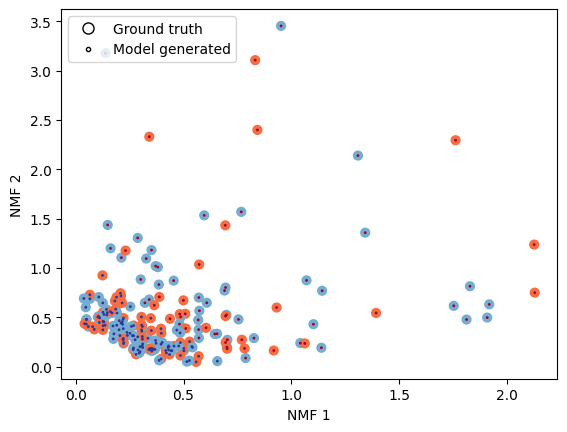

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import NMF


#KMedoids
kmedoids = KMedoids(n_clusters=2, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

nmf = NMF(n_components=2).fit(X_train)
nmf_emb_test = nmf.transform(X_test)

cmap = "RdYlBu"
l = 200
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#f56d43" if x== 1 else "#75acd2" for x in list(y_test[0:l])], norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(nmf_emb_test[:, 0][0:l], nmf_emb_test[:, 1][0:l], c=["#a50126" if x== 1 else "#313694" for x in list(clusters_kmedoids[0:l])], norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create a new color map using only the unique colors
#new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))

# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel('NMF 1')
plt.ylabel('NMF 2')
plt.savefig(f'graph_resualts_plot_{cmap}_last_NMF.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.neighbors import LocalOutlierFactor

def plot_lof_anomalies(data):
    ocsvm = OneClassSVM(nu=0.1)
    ocsvm.fit(data)
    scores = ocsvm.decision_function(data)
    
    # Scale the scores to the range [0, 1]
    scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

    # Count the number of points in each score bin
    bins = np.linspace(0, 1, num=100)
    hist, _ = np.histogram(scores, bins=bins)

    # Plot the anomaly score histogram as a bar plot
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), align='edge', color=cm.Accent(0.3), edgecolor='black')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Number of Points')
    
    # Add a black dashed line at the 10% mark
    percentile_1 = np.percentile(scores, 99)
    percentile_10 = np.percentile(scores, 90)
    plt.axvline(x=percentile_1, linestyle='--', color="red", label="1%")
    plt.axvline(x=percentile_10, linestyle='--', color='fuchsia', label="10%")
    
    plt.legend()
    
    plt.savefig("AD_plot_graphs.png", dpi=300, bbox_inches='tight')
    plt.show()


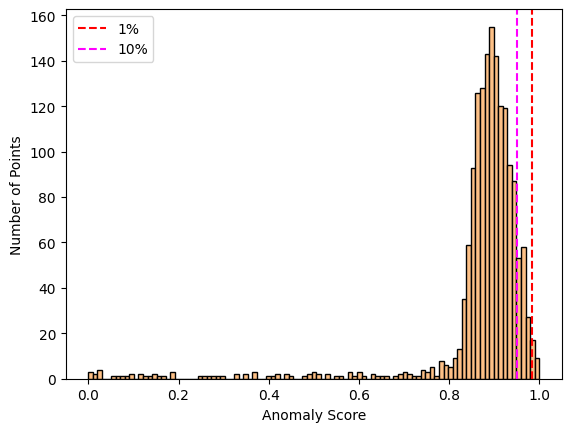

In [28]:
plot_lof_anomalies(X_train)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn_extra.cluster import KMedoids
from matplotlib.colors import ListedColormap

def k_medoids_silhouette(data, labels, k):
    # Create KMedoids model with k clusters
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(data)
    
    # Get cluster labels and compute silhouette scores
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Set up colormap and plot silhouette scores
    cmap = ListedColormap(plt.cm.RdYlBu(np.linspace(0, 1, k)))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cmap(i)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10
    
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.savefig("Silhouette_plot_graph.png", dpi=300, bbox_inches='tight')
    plt.show()


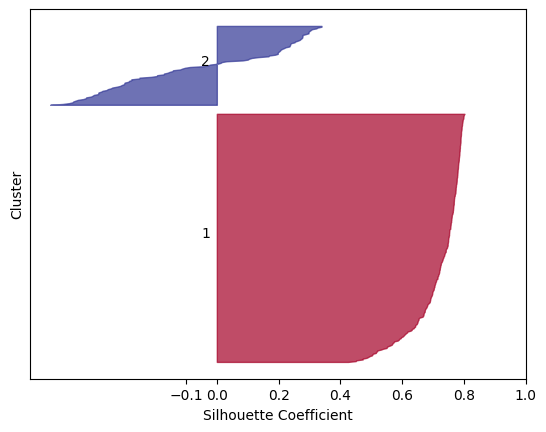

In [11]:
k_medoids_silhouette(X_test, y_test, 2)